In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:05<00:00, 213MB/s]
100% 1.06G/1.06G [00:05<00:00, 191MB/s]


In [6]:
!mkdir catsvdogs
!unzip /content/dogs-vs-cats.zip -d catvdogs

Streaming output truncated to the last 5000 lines.
  inflating: catvdogs/train/dogs/dog.4419.jpg  
  inflating: catvdogs/train/dogs/dog.442.jpg  
  inflating: catvdogs/train/dogs/dog.4420.jpg  
  inflating: catvdogs/train/dogs/dog.4421.jpg  
  inflating: catvdogs/train/dogs/dog.4422.jpg  
  inflating: catvdogs/train/dogs/dog.4424.jpg  
  inflating: catvdogs/train/dogs/dog.4425.jpg  
  inflating: catvdogs/train/dogs/dog.4426.jpg  
  inflating: catvdogs/train/dogs/dog.4427.jpg  
  inflating: catvdogs/train/dogs/dog.4431.jpg  
  inflating: catvdogs/train/dogs/dog.4433.jpg  
  inflating: catvdogs/train/dogs/dog.4436.jpg  
  inflating: catvdogs/train/dogs/dog.4438.jpg  
  inflating: catvdogs/train/dogs/dog.4439.jpg  
  inflating: catvdogs/train/dogs/dog.444.jpg  
  inflating: catvdogs/train/dogs/dog.4440.jpg  
  inflating: catvdogs/train/dogs/dog.4441.jpg  
  inflating: catvdogs/train/dogs/dog.4442.jpg  
  inflating: catvdogs/train/dogs/dog.4443.jpg  
  inflating: catvdogs/train/dogs/dog.44

In [7]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential

In [9]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/catvdogs/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/catvdogs/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))


model.add(Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Conv2D(128,(3,3),activation='relu',padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0,1))



model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_6 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [19]:
#compile 
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 79s 105ms/step - loss: 0.8836 - accuracy: 0.6603 - val_loss: 0.5634 - val_accuracy: 0.7064
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4920 - accuracy: 0.7653 - val_loss: 0.7084 - val_accuracy: 0.7190
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4077 - accuracy: 0.8159 - val_loss: 0.5883 - val_accuracy: 0.7572
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3223 - accuracy: 0.8596 - val_loss: 0.7297 - val_accuracy: 0.6880
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2264 - accuracy: 0.9086 - val_loss: 0.6095 - val_accuracy: 0.7676
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.1401 - accuracy: 0.9452 - val_loss: 0.7401 - val_accuracy: 0.8022
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0971 - accuracy: 0.9633 - val_loss: 1.1347 - val_ac

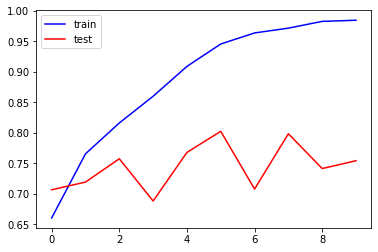

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='test')
plt.legend()
plt.show()

In [24]:
import cv2 as cv
import numpy as np
import argparse
import time 

testimg = cv.imread('/content/dog.jpg')

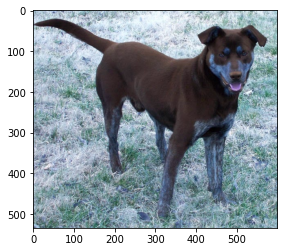

In [25]:
plt.imshow(testimg)

In [29]:
testimg.shape

(534, 600, 3)

In [33]:
t = cv.resize(testimg,(256,256))
ti = t.reshape((1,256,256,3))

In [35]:
model.predict(ti)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)

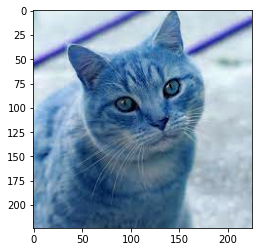

In [51]:
test_img = cv.imread('/content/cat.jpg')
plt.imshow(test_img)
t2 = cv.resize(test_img,(256,256))
t2i = t.reshape((1,256,256,3))

In [52]:
model.predict(t2i)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)